# Training Models Exercises

### Linear Regression Model

##### The normal equation 
Generating some linear-looking data 

In [1]:
import numpy as np 

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

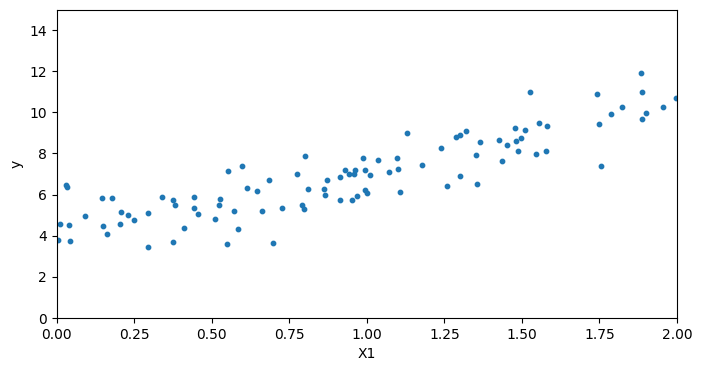

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

Now let's compute the Normal Equation

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance

# linalg.inv - inverse matrix
# dot - matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.00968351],
       [3.10480075]])

Noise made it impossible to recover the exact parameters (4 and 3) of the original function.
Now we can make predictions using this theta.

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00968351],
       [10.21928501]])

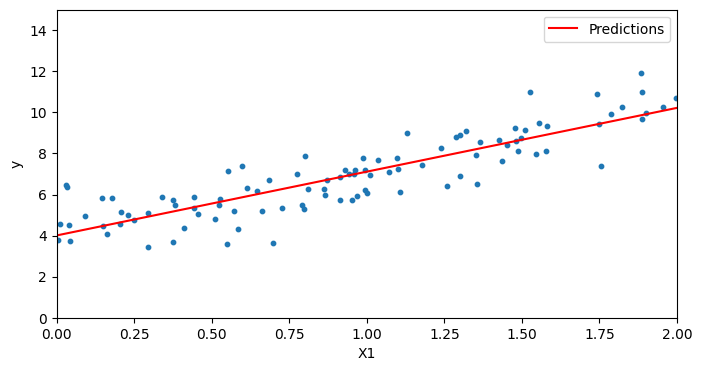

In [7]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-", label='Predictions')
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Performing linear regression using scikit learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00968351]), array([[3.10480075]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.00968351],
       [10.21928501]])

#### Batch Gradient Descent
Using full set

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

# random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[4.00968351],
       [3.10480075]])

#### Stochastic Gradient Descent
Using a randomly picked entity of set in each iteration
Using a simple learning scheduling - gradually reducing the learning rate.

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[4.03446396],
       [3.15384259]])

Using sklearn SGD Regressor

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98564742]), array([3.1199145]))

#### Mini-batch Gradient Descent
Using a small set of randomly picked entities in each iteration

### Polynomial Regression

Generating non linear data based on simple quadratic equation

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # values from -3 to 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

(-3.0, 3.0, 0.0, 10.0)

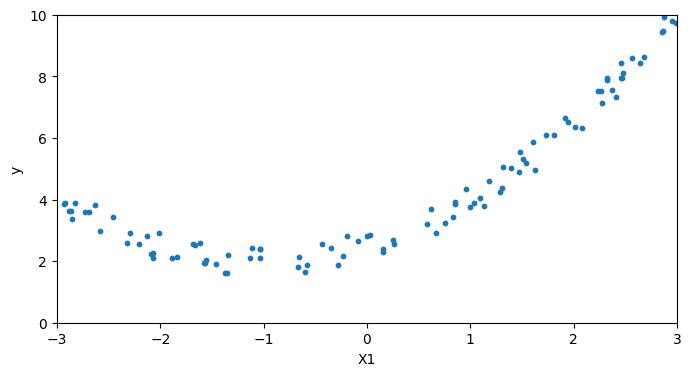

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([-3, 3, 0, 10])

<i>PolynomialFeatures</i> adds the square (or more powers) of each feature in the training set as a new feature. In this case there is just one feature.

<b>Important Note:</b> When there are multiple features, Polynomial Regression is capable of finding relationships between features.For  example,  if  there  were two  features  a  and  b,  <i>PolynomialFeatures</i> with  degree=3  would  not  only  add  thefeatures a^2, a^3, b^2, and b^3, but also the combinations ab, a^2b, and ab^2

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.85147232]
[-2.85147232  8.13089441]


Now we can fit a <i>LinearRegression</i> model to this extended training data

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49436327]), array([[1.01023032, 0.50283385]]))

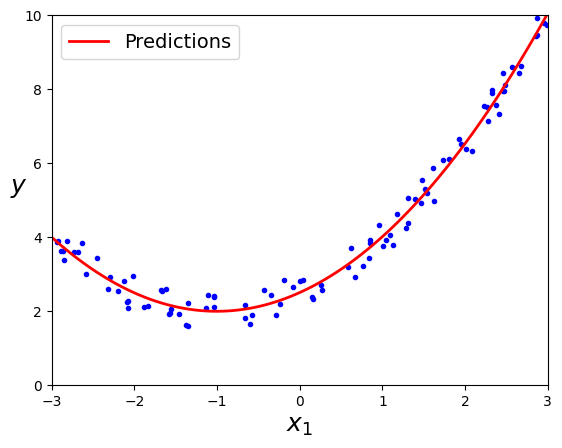

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 5])    

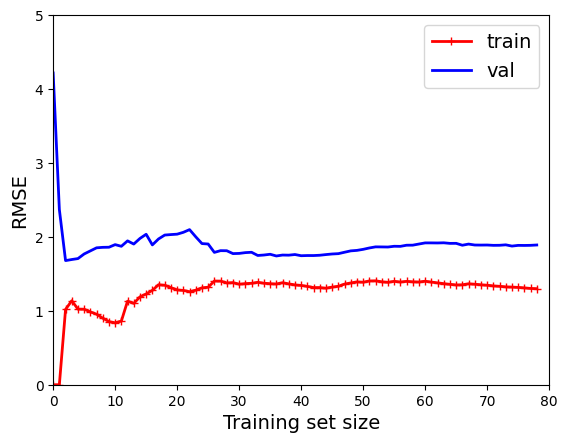

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

When the training set is small the errors is almost zero for training set and very high for the validation set. When the new instances are added the error is goes up until it reaches a plateu. The validation error is high when the the learning set is small. With bigger set the model learns better and the error is smaller until it reaches a plateu.

<b>These learning curves are typical of an underfitting model. Both curves have reacheda plateau; they are close and fairly high.</b>

Nowe let's look at the 10th degree polynomial model on the same data.

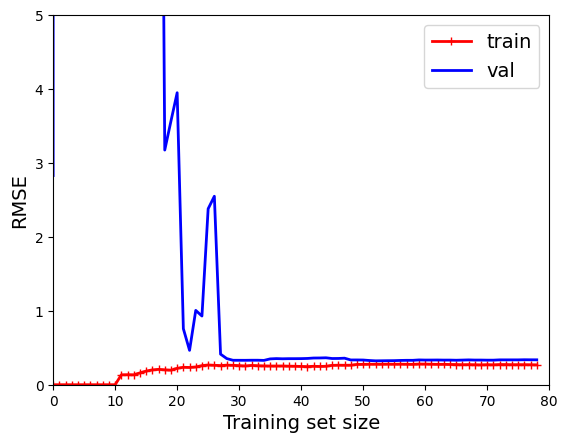

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones but there are two very important differences:
* The error on the training data is much lower than with thge Linear Regression
* There is a gap between curves. This means that the model performs significantly better on the training data than on the validation data. That means that this model is overfitting the data. However if you used a much larger dataset the two curves would continue to get closer.

An  important  theoretical  result  of  statistics  and  Machine  Learning  is  the  fact  that  amodel’s  generalization  error  can  be  expressed  as  the  sum  of  three  very  different errors:
* <b>Bias</b> - This part of the generalization error is due to wrong assumptions, such as assum‐ing that the data is linear when it is actually quadratic. A high-bias model is mostlikely to underfit the training data. 
* <b>Variance</b> - This  part  is  due  to  the  model’s  excessive  sensitivity  to  small  variations  in  thetraining data. A model with many degrees of freedom (such as a high-degree pol‐ynomial  model)  is  likely  to  have  high  variance,  and  thus  to  overfit  the  trainingdata.
* <b>Irreducible error</b> - This  part  is  due  to  the  noisiness  of  the  data  itself.  The  only  way  to  reduce  thispart of the error is to clean up the data (e.g., fix the data sources, such as brokensensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

### Regularized Linear Models
<b>Tip:</b> It is important to scale the data for the most of regularized models before performing them.

#### Ridge regression
Ridge regression is a regularized (contrainted - fewer degrees of freedom) version of Linear Regression. The regularization term should only be added to the cost funstion during trainnig. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

In the ridge regression the regularization term is <b>alpha \* sum(theta^2)</b> added to the cost funtion. 
This  forces  the  learning  algorithm  to  not  only  fit  the  data  but  also  keep  the  model weights  as  small  as  possible.
Note that the sum starts from n=1 not n=0 - the bias term theta_0 is not regularized.

So the cost function is <b>J(theta) = MSE(theta) + alpha*sum(theta^2) </b>

* alpha - hyperparamters controlling how much you wnt to regularize model
* theta - features


In [22]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [24]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Instead of Ridge we can use SGDRegressor with penelty set to 'l2'

In [25]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

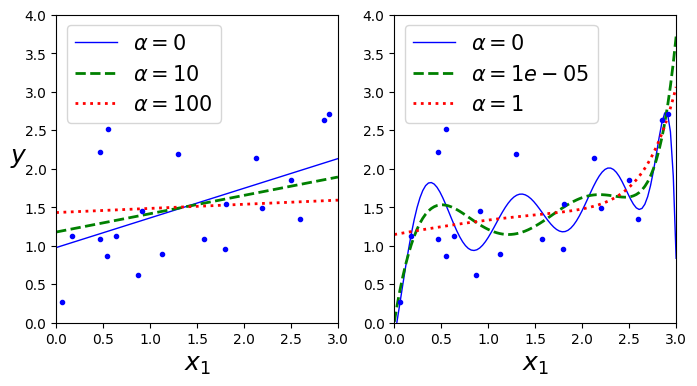

In [26]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()

        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regular_reg", model)
            ])

        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()


Increasing alpha leads to flatter predictions (less extreme, more reasonable). This reduces the model's variance but increases its bias

#### Lasso Regression
<i>Least  Absolute  Shrinkage  and  Selection  Operator  Regression</i> is another regularized version of Linear Regression. just  like  Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 normof the weight vector instead of half the square of the l2 norm.

<b>J(theta) = MSE(theta) + alpha \* sum(|theta|)</b>

c:\Users\m.olszanski\Desktop\Bench_projects\ML_basics\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


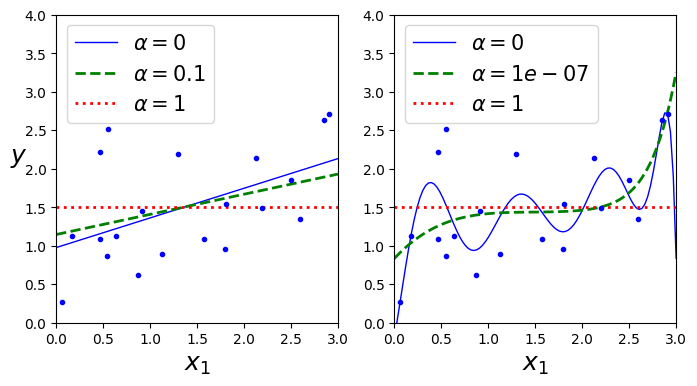

In [27]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

Lasso Regression tends to completetly eliminate the weights of the least important features (i.e. set them to zero). For example thge dashed line in the figure above looks quadratic, almost linear: all the wights for the high-degree polynomial features are equal to zero. In other words, <B>Lasso Regression automatically performs feature selection</b> and outputs a <i>sparse model</i> (i.e with few nonzero feature wights).

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Instead of Lasso Regressorion we can use the SGDRegressor with penalty set to'l1'

In [29]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

#### Elastic Net
Elastic Net is a middle ground between Ridge and Lasso Regressions. The regularization term is a simple mix of bnoth Ridge and Lasso's terms, and you can control the mix of ratio <i>r</i>. When <i>r</i> = 0, Elastic Net is equivalent to Ridge Regression, and when <i>r</i> = 1, it is equivalent to Lasso Regression.

In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])


#### When to use plain Linear Regression, Ridge, Lasso or Elastic Net?
* It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.
* Ridge is a good default
* If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net
* In genreal Elastic Net is preferred over Lasso since Lasso may behave erratically, when the number of features is greater than training instances or when several features are strongly correlated.

#### Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called <i>early stopping</i>.
As  the epochs go by, the algorithm learns and its prediction error (RMSE) on the training setnaturally goes down, and so does its prediction error on the validation set. However after  a  while  the  validation  error  stops  decreasing  and  actually  starts  to  go  back  up. This indicates that the model has started to overfit the training data. With early stop‐ping you just stop training as soon as the validation error reaches the minimum.

In [31]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [32]:
from copy import deepcopy

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.inf, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [33]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

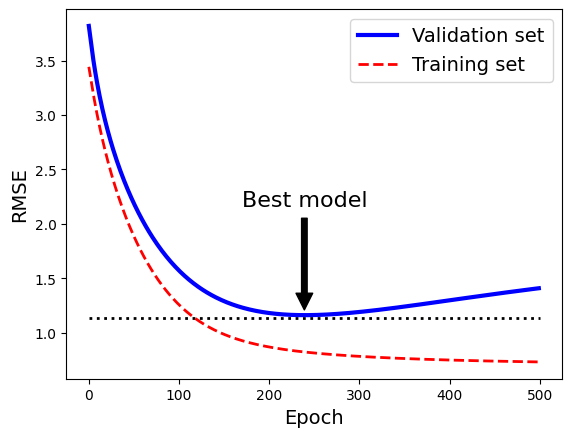

In [34]:
# Create a graph

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

### Logistic Regression
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the probability is greater than 50% then the model predicts it belongs to class (positive class, labeled "1"), or else it predicts it does not (it belongs to the negative class, labeled "0"). This makes it a binary classifier.

#### Estimating probabilities
It calculates a weighted sum of the input features, but isntead of uutputing the result directly like the Linear Regression model does, it outputs the <i>logistic</i> of the result.

The logistic (sigma) is a sigmoid function that outputs a number between 0 and 1.

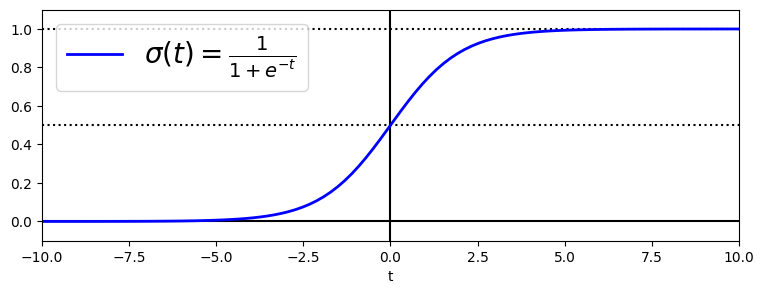

In [36]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

#### Training and Cost Function
Cost function is 
* -log(p) if y = 1 
* -log(1-p) if y = 0

Where
* p - probability
* y - label

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called the <i>log loss</i>.

It is impossible to calculate the value of theta that minimzes the cost function (there is no evuivalent to Notmal Equation), but the cost funxion is convex, so Gradient Descent is guaranteed to find the global minimum.

#### Decision Boundaries
We will use the Iris dataset, wchich contains the  sepal  and  petal  length  and  width  of  150  iris  flowers  of  three  different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

First we will try to build a classifier to detect the Iris-Virginica type based only on the petal width feature.

In [45]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width 
y = (iris["target"] == 2).astype(int)    # 1 if Iris-Virginica, else 0


In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

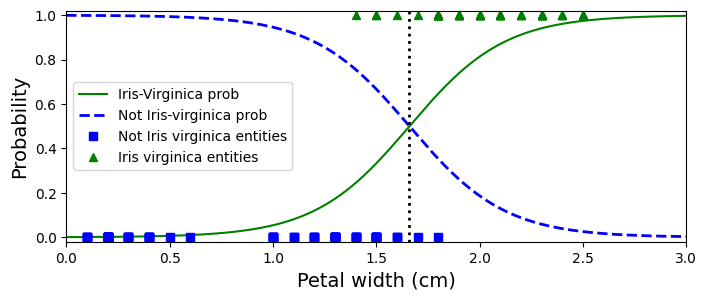

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris-Virginica prob")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-virginica prob")
plt.plot(X[y==0], y[y==0], "bs", label="Not Iris virginica entities")
plt.plot(X[y==1], y[y==1], "g^", label="Iris virginica entities")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=10)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called <i>Softmax Regression</i> or <i>Multinomial Regression</i>.

The idea is that: when given an instance x, the Softmax Regression model first computes a score for each class, then estimates the probability of each class by applying the softmax function (also called normalized exponential) to the score.

The Softmax Regression classifier predicts only one class at a time -it is multiclass not multioutput. It should be used only with mutually exclusive clases such as different species of a plant, and not to e.g. recognize multiple poeple on the picture.

#### Training
Minimizig the <i>cross entropy</i> cost function.

Scikit-Learn LogisticREgression uses one-vs-all by default when you train it on more than tywo classes, but you can set multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.
You  must  also  specify  a  solver  that  supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation  for  more  details).  It  also  applies  l2  regularization  by  default,  which  you  can control using the hyperparameter C.

In [57]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [60]:
softmax_reg.predict([[5, 2]]) # returns number of class

array([2])

In [61]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])